# DATA_ENG 200: School District Analysis

**Group Name**: School District <br>
**Group Member**: Evangeline Gong, Paula Fregene, Viktoriia Sokolenko <br>
***

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd

#From The U.S. Department of Education's Office for Civil Rights (OCR)
sat_act = pd.read_csv('SAT and ACT.csv') #stores thr total number of students taking SAT/ACT across schools
ap = pd.read_csv('Advanced Placement.csv') #stores the number of AP courses offered
school_char = pd.read_csv('Enrollment.csv') #stores the total enrollment of students across schools
cs = pd.read_csv('Computer Science.csv') #stores the number of computer science classes offered
adv_math = pd.read_csv('Advanced Mathematics.csv') #stores the number of advanced mathematics classes offered

#From The National Center for Education Statistics (NCES) Common Core of Data (CCD) program
sch_dist = pd.read_csv('School_District_Characteristics.csv')

# Data Preprocessing

In [3]:
# Dropping all unneccassary columns in each dataset
ap = ap.drop(ap.columns.difference(['SCH_APCOURSES', 'SCHID', 'LEAID']), axis=1)
cs = cs.drop(cs.columns.difference(['SCH_COMPCLASSES_CSCI', 'SCHID', 'LEAID']), axis=1)
adv_math = adv_math.drop(adv_math.columns.difference(['SCH_MATHCLASSES_ADVM', 'SCHID', 'LEAID']), axis=1)
sch_dist = sch_dist.drop(sch_dist.columns.difference(['STUTERATIO', 'LOCALE_TEXT', 'LEAID', 'Lat', 'Long']), axis=1)

In [4]:
# Calculating the total sat_and_act enrollment since original data is split between male and females
sat_act['TOT_SAT_ACT'] = sat_act[['TOT_SATACT_M', 'TOT_SATACT_F']].sum(axis=1)

In [5]:
# Calculating the total high school student enrollment in different schools since original data is split between male, females, and nonbinary
school_char['TOT_ENR_X'] = school_char['TOT_ENR_X'].clip(lower=0) # adding the count of non-binary students if present in dataset
school_char['TOT_HS_STU'] = school_char[['TOT_ENR_M', 'TOT_ENR_F', 'TOT_ENR_X']].sum(axis=1)

In [6]:
# Dropping all unneccassary columns in sat_and_act dataset
sat_act = sat_act.drop(sat_act.columns.difference(['SCHID', 'TOT_SAT_ACT', 'LEAID']), axis=1)

In [7]:
# Dropping all unneccassary columns in school characteristics dataset
school_char = school_char.drop(school_char.columns.difference(['SCHID', 'LEAID', 'TOT_HS_STU', 'TOT_ENR_M', 'TOT_ENR_F', 'TOT_ENR_X']), axis=1)

In [8]:
# Example of how school_char looks like once unneccessary columns are dropped
school_char.head()

,LEAID,SCHID,TOT_ENR_M,TOT_ENR_F,TOT_ENR_X,TOT_HS_STU
0,100002,99995,105,0,0,105
1,100005,870,453,448,0,901
2,100005,871,857,815,0,1672
3,100005,879,471,459,0,930
4,100005,889,500,393,0,893


In [9]:
# Merging the school_char data with sat_act based on both their school ID and district ID
# new dataset is named sat_act_percentage since we will be using this to get the percent of students enrolled in SAT/ACY from the total number of students in the high school
sat_act_percentage = school_char.merge(sat_act, how="inner", on=["SCHID", "LEAID"])

In [10]:
# calculate percentage of high school students taking SAT/ACT per school
sat_act_percentage['SCH_SAT_ACT_PERCENT'] = (sat_act_percentage['TOT_SAT_ACT'] / sat_act_percentage['TOT_HS_STU']) * 100

In [11]:
# drop columns that were used to calculate SCH_SAT_ACT_PERCENT since they are not needed now
sat_act_percentage = sat_act_percentage.drop(sat_act_percentage.columns.difference(['SCHID', 'LEAID', 'TOT_HS_STU', 'TOT_SAT_ACT', 'SCH_SAT_ACT_PERCENT']), axis=1)

In [12]:
# Now that the SAT/ACT participation % is calculated, merge all the tables with needed variables together
sch = sat_act_percentage.merge(ap, how="inner", on=["SCHID", "LEAID"])
sch = sch.merge(cs, how="inner", on=["SCHID", "LEAID"])
sch = sch.merge(adv_math, how="inner", on=["SCHID", "LEAID"])
lea_sch = sch.merge(sch_dist, how="inner", on=["LEAID"])

In [13]:
#Schools' dataset after merging
sch.describe()

,SCHID,TOT_HS_STU,TOT_SAT_ACT,SCH_SAT_ACT_PERCENT,SCH_APCOURSES,SCH_COMPCLASSES_CSCI,SCH_MATHCLASSES_ADVM
count,81626.000000,81626.000000,81626.000000,8.162400e+04,81626.000000,81626.000000,81626.000000
mean,4090.195146,506.387585,19.840075,-inf,-6.190871,-5.747801,-4.968270
std,9686.308857,476.855419,122.558199,NaN,7.538383,6.807793,8.494419
min,0.000000,-18.000000,-18.000000,-inf,-9.000000,-9.000000,-9.000000
25%,763.000000,241.000000,-18.000000,-5.263158e+00,-9.000000,-9.000000,-9.000000
50%,1826.000000,410.000000,-18.000000,-3.284672e+00,-9.000000,-9.000000,-9.000000
75%,4545.000000,622.000000,0.000000,0.000000e+00,-9.000000,0.000000,0.000000
max,99999.000000,18090.000000,2827.000000,9.000000e+02,91.000000,410.000000,237.000000


In [14]:
#School districts dataset after merging
lea_sch.describe()

,SCHID,TOT_HS_STU,TOT_SAT_ACT,SCH_SAT_ACT_PERCENT,SCH_APCOURSES,SCH_COMPCLASSES_CSCI,SCH_MATHCLASSES_ADVM,STUTERATIO,Lat,Long
count,60493.000000,60493.000000,60493.000000,6.049200e+04,60493.000000,60493.000000,60493.000000,60493.00000,60493.000000,60493.000000
mean,3709.927859,530.802407,20.863191,-inf,-6.178682,-6.012944,-5.112162,16.06898,36.875479,-96.556442
std,7907.828894,481.580236,129.368580,NaN,7.582550,6.366466,8.630668,4.07242,6.095294,17.003770
min,0.000000,-18.000000,-18.000000,-inf,-9.000000,-9.000000,-9.000000,-2.00000,18.429170,-170.279219
25%,763.000000,260.000000,-18.000000,-5.113636e+00,-9.000000,-9.000000,-9.000000,13.69000,33.225457,-111.898988
50%,1843.000000,430.000000,-18.000000,-3.260870e+00,-9.000000,-9.000000,-9.000000,15.43000,37.073238,-92.279421
75%,4325.000000,645.000000,-18.000000,0.000000e+00,-9.000000,-9.000000,-9.000000,18.25000,41.024822,-82.993629
max,99999.000000,14967.000000,2827.000000,9.000000e+02,91.000000,410.000000,237.000000,125.15000,71.291244,-66.072485


# Data Cleaning

In [15]:
# Only include the data that have these four criteria:
# 1. The AP Courses number in the school is zero or positive since the original dataset uses negative codes to indicate invalid data
# 2. The Total Amount of students enrolled in SAT and ACT is also zero or positive since the original dataset uses negative codes to indicate invalid data
# 3. The SAT and ACT enrollment percentage based on the total amount of student is <= 100% since anything more is not possible
# 4. The maximum amount of AP Courses available should be 40
# 5. Advanced math and computer science course offerings values are positive since the original dataset uses negative codes to indicate invalid data
mask = (sch['SCH_APCOURSES'] >= 0) & (sch['TOT_SAT_ACT'] >= 0) & (sch['SCH_SAT_ACT_PERCENT'] <= 100) & (sch['SCH_APCOURSES'] <= 40) & (sch['SCH_MATHCLASSES_ADVM'] >= 0) & (sch['SCH_COMPCLASSES_CSCI'] >= 0)
sch = sch[mask]

In [16]:
sch.describe() #the final cleaned dataframe with schools' data

,SCHID,TOT_HS_STU,TOT_SAT_ACT,SCH_SAT_ACT_PERCENT,SCH_APCOURSES,SCH_COMPCLASSES_CSCI,SCH_MATHCLASSES_ADVM
count,11718.000000,11718.000000,11718.000000,11718.000000,11718.000000,11718.000000,11718.000000
mean,3490.871736,1057.857740,206.387865,18.933744,10.467401,4.811572,9.779229
std,6777.205279,843.735936,242.627732,14.030156,8.083032,10.173086,11.971396
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,725.000000,433.000000,37.000000,7.142857,4.000000,0.000000,2.000000
50%,1717.000000,830.000000,118.000000,19.354839,9.000000,2.000000,6.000000
75%,4164.000000,1513.000000,296.000000,26.912742,16.000000,6.000000,13.000000
max,99999.000000,18090.000000,2827.000000,100.000000,40.000000,410.000000,237.000000


In [17]:
mask = (lea_sch['SCH_APCOURSES'] >= 0) & (lea_sch['TOT_SAT_ACT'] >= 0) & (lea_sch['SCH_SAT_ACT_PERCENT'] <= 100) & (lea_sch['SCH_APCOURSES'] <= 40) & (lea_sch['SCH_MATHCLASSES_ADVM'] >= 0) & (lea_sch['SCH_COMPCLASSES_CSCI'] >= 0) & (lea_sch['STUTERATIO']>=0)
lea_sch = lea_sch[mask]

In [18]:
# The final cleaned dataframe with school districts' data
lea_sch.describe()

,SCHID,TOT_HS_STU,TOT_SAT_ACT,SCH_SAT_ACT_PERCENT,SCH_APCOURSES,SCH_COMPCLASSES_CSCI,SCH_MATHCLASSES_ADVM,STUTERATIO,Lat,Long
count,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000
mean,3202.477712,1108.404307,219.858168,19.177358,10.612481,4.494153,10.337386,16.013035,36.785997,-94.750310
std,5837.266063,849.038363,257.255225,13.885099,8.163382,9.194863,12.550080,3.787375,5.967321,16.455353
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.620000,18.429170,-163.724886
25%,714.000000,435.000000,38.000000,7.438017,4.000000,0.000000,2.000000,13.630000,33.429231,-105.164489
50%,1696.000000,905.000000,122.000000,19.881306,9.000000,2.000000,6.000000,15.270000,37.114740,-89.245584
75%,3849.000000,1631.000000,319.000000,27.287582,16.000000,6.000000,14.000000,18.100000,40.964385,-82.377700
max,99999.000000,14967.000000,2827.000000,100.000000,39.000000,410.000000,237.000000,77.450000,64.842168,-66.072485


#Categorizing district's location

In [19]:
#unique locale_text values
lea_sch['LOCALE_TEXT'].unique()

array(['32-Town: Distant', '42-Rural: Distant', '21-Suburb: Large',
       '13-City: Small', '41-Rural: Fringe', '31-Town: Fringe',
       '23-Suburb: Small', '43-Rural: Remote', '12-City: Mid-size',
       '33-Town: Remote', '22-Suburb: Mid-size', '11-City: Large'],
      dtype=object)

In [20]:
# Make 2 Buckets
def local_classifier_into_2(locale):
    if 'Town' in locale:
        return 'Rural'
    elif 'Rural' in locale:
        return 'Rural'
    elif 'Suburb' in locale:
        return 'Urban'
    else:
        return 'Urban'
lea_sch['LOCALE_CAT'] = lea_sch['LOCALE_TEXT'].map(local_classifier_into_2)

Text(0, 0.5, 'Total Number of Schools')

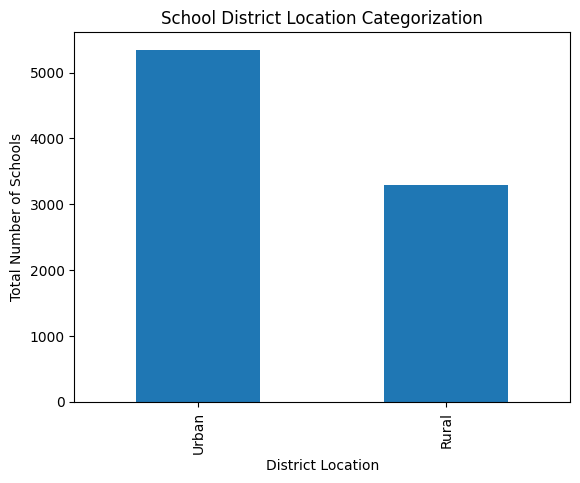

In [21]:
import matplotlib.pyplot as plt
lea_sch['LOCALE_CAT'].value_counts().plot(kind='bar')
plt.title('School District Location Categorization')
plt.xlabel('District Location')
plt.ylabel('Total Number of Schools')

In [22]:
# Make 4 Buckets
def local_classifier_into_4(locale):
    if 'Town' in locale:
        return 'Town'
    elif 'Rural' in locale:
        return 'Rural'
    elif 'Suburb' in locale:
        return 'Suburb'
    else:
        return 'City'
lea_sch['LOCALE_CAT_4'] = lea_sch['LOCALE_TEXT'].map(local_classifier_into_4)

Text(0, 0.5, 'Total Number of Schools')

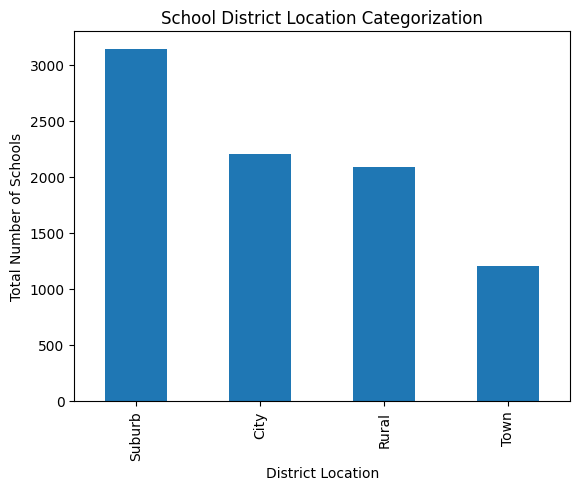

In [23]:
lea_sch['LOCALE_CAT_4'].value_counts().plot(kind='bar')
plt.title('School District Location Categorization')
plt.xlabel('District Location')
plt.ylabel('Total Number of Schools')

#Classification models (the student outcomes and school resources correlated with the school district urban/rural location)

Using Classification Model to see if the student outcomes and school resources can be correlated with the school district location

School district location:
- LOCALE_CAT: category of the district's location (rural vs urban)

Student outcomes indicators:
- SCH_SAT_ACT_PERCENT: the percentage of high school students taking SAT/ACT at each school

School resources indicators:
- SCH_APCOURSES: the number of AP courses offered at each school

- SCH_MATHCLASSES_ADVM: the number of Advanced Math classes offered at each school

- SCH_COMPCLASSES_CSCI: the number of Computer Science classes offered at each school

- STUTERATIO: the student-teacher ratio at each school district

Classification models:
- Logistic Regression
- Random Forest Classifier



##SAT/ACT percentage and student-teacher ratio VS category of district location

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [26]:
X = lea_sch[['SCH_SAT_ACT_PERCENT', 'STUTERATIO']]
y = lea_sch['LOCALE_CAT']

In [27]:
enc = LabelEncoder()
y = enc.fit_transform(y)

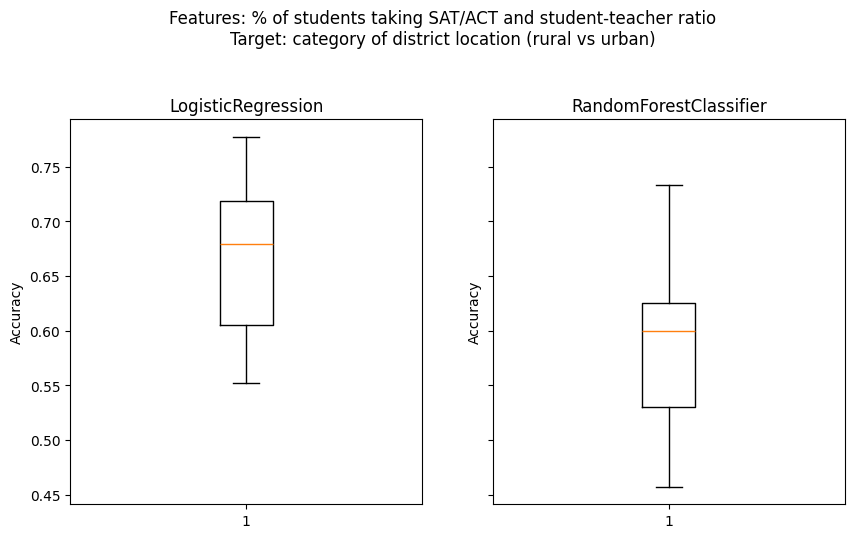

<Figure size 640x480 with 0 Axes>

In [28]:
models = [LogisticRegression, RandomForestClassifier]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')

plt.suptitle('Features: % of students taking SAT/ACT and student-teacher ratio \n' 'Target: category of district location (rural vs urban) \n \n', y=1.1)
plt.show()
plt.subplots_adjust(top=0.8)


##AP courses, SAT/ACT percentage, and and student-teacher ratio VS category of district location

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [31]:
X = lea_sch[['SCH_APCOURSES', 'SCH_SAT_ACT_PERCENT', 'STUTERATIO']]
y = lea_sch['LOCALE_CAT']

In [32]:
enc = LabelEncoder()
y = enc.fit_transform(y)

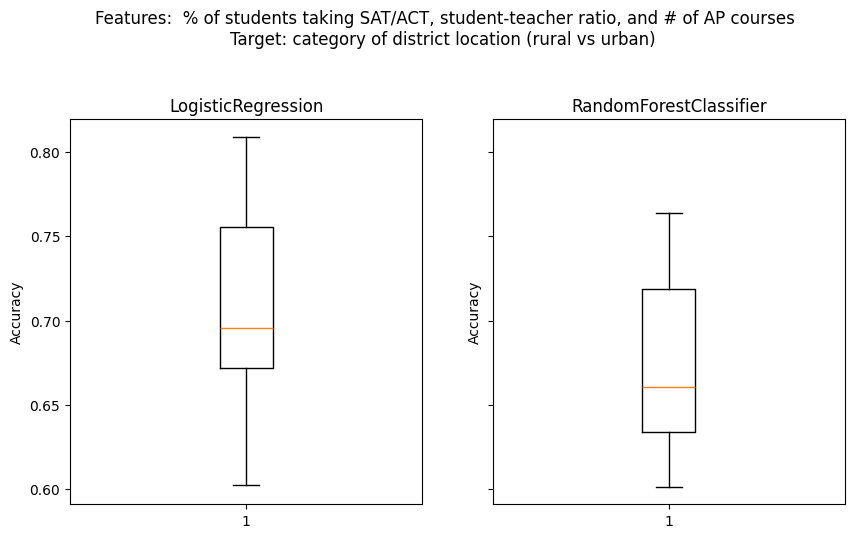

<Figure size 640x480 with 0 Axes>

In [33]:
models = [LogisticRegression, RandomForestClassifier]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')
plt.suptitle('Features:  % of students taking SAT/ACT, student-teacher ratio, and # of AP courses\n' 'Target: category of district location (rural vs urban) \n \n', y=1.1)
plt.show()
plt.subplots_adjust(top=0.8)


##AP courses and student-teacher ratio VS category of district location

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [36]:
X = lea_sch[['SCH_APCOURSES', 'STUTERATIO']]
y = lea_sch['LOCALE_CAT']

In [37]:
enc = LabelEncoder()
y = enc.fit_transform(y)

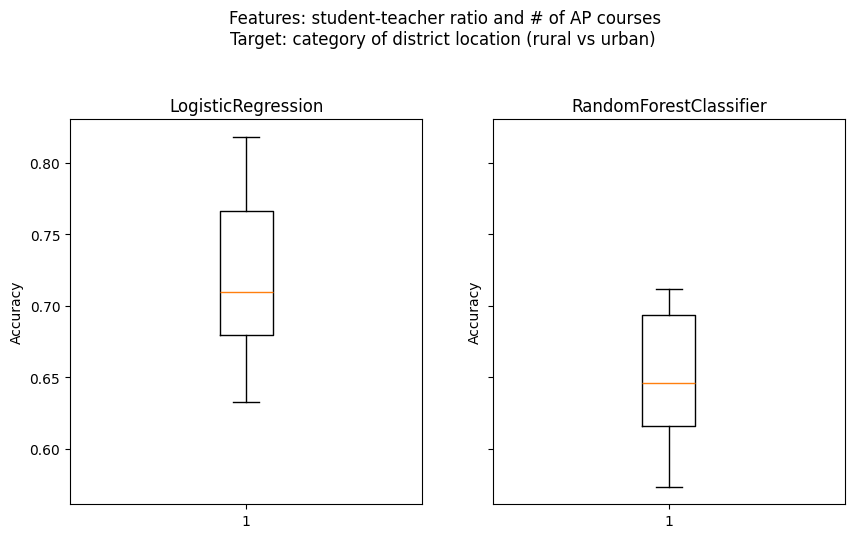

<Figure size 640x480 with 0 Axes>

In [38]:
models = [LogisticRegression, RandomForestClassifier]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')
plt.suptitle('Features: student-teacher ratio and # of AP courses\n' 'Target: category of district location (rural vs urban) \n \n', y=1.1)
plt.show()
plt.subplots_adjust(top=0.8)


##AP courses, Advanced Math classes, and student-teacher ratio VS category of district location

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [41]:
X = lea_sch[['SCH_APCOURSES', 'SCH_MATHCLASSES_ADVM', 'STUTERATIO']]
y = lea_sch['LOCALE_CAT']

In [42]:
enc = LabelEncoder()
y = enc.fit_transform(y)

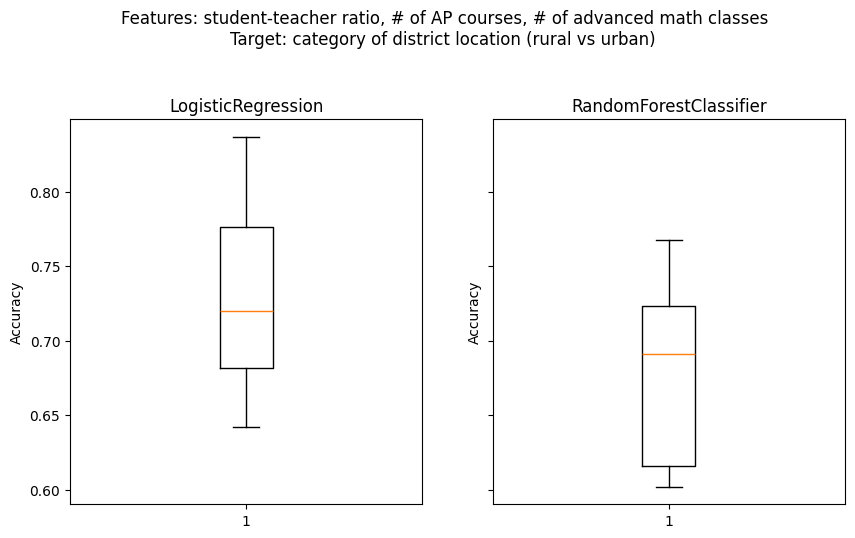

<Figure size 640x480 with 0 Axes>

In [43]:
models = [LogisticRegression, RandomForestClassifier]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')
plt.suptitle('Features: student-teacher ratio, # of AP courses, # of advanced math classes\n' 'Target: category of district location (rural vs urban) \n \n', y=1.1)
plt.show()
plt.subplots_adjust(top=0.8)


##AP courses, Advanced Math classes, Computer Science classes, and student-teacher ratio VS category of district location

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [46]:
X = lea_sch[['SCH_APCOURSES', 'SCH_MATHCLASSES_ADVM', 'STUTERATIO', 'SCH_COMPCLASSES_CSCI']]
y = lea_sch['LOCALE_CAT']

In [47]:
enc = LabelEncoder()
y = enc.fit_transform(y)

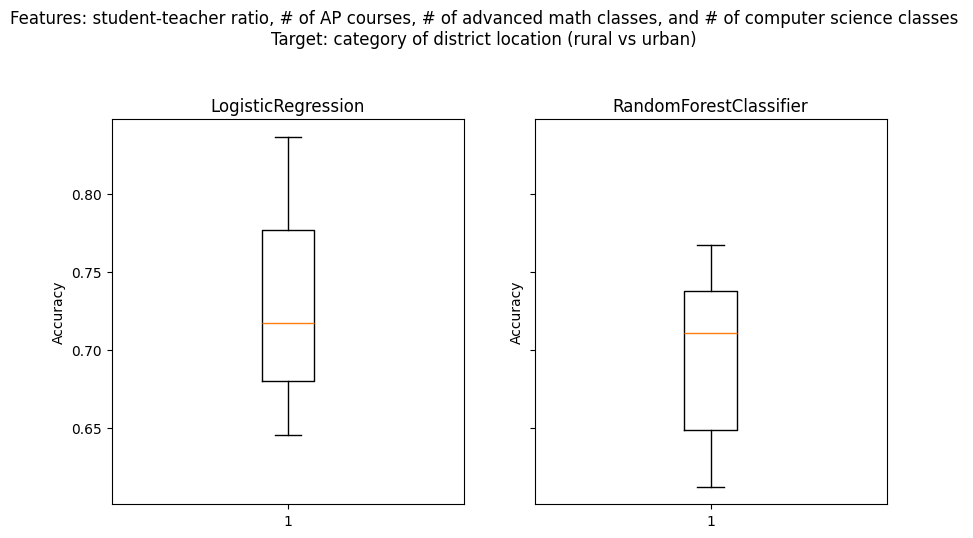

<Figure size 640x480 with 0 Axes>

In [48]:
models = [LogisticRegression, RandomForestClassifier]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10)
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')
plt.suptitle('Features: student-teacher ratio, # of AP courses, # of advanced math classes, and # of computer science classes \n' 'Target: category of district location (rural vs urban) \n \n', y=1.1)
plt.show()
plt.subplots_adjust(top=0.8)

## Best Logistic Regression model

In [49]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

X = lea_sch[['SCH_APCOURSES', 'SCH_SAT_ACT_PERCENT', 'STUTERATIO', 'SCH_MATHCLASSES_ADVM', 'SCH_COMPCLASSES_CSCI']]
y = lea_sch['LOCALE_CAT']

# Encode the target variable
enc = LabelEncoder()
y = enc.fit_transform(y)

features = list(X.columns)  # Feature names
best_score = 0
best_subset = None

for r in range(1, len(features) + 1):
    for subset in combinations(features, r):
        X_subset = X[list(subset)]
        model = LogisticRegression(max_iter=1000)
        score = np.mean(cross_val_score(model, X_subset, y, cv=5))  # 5-fold cross-validation
        print(f"Subset: {subset}, Accuracy: {score:.4f}")
        if score > best_score:
            best_score = score
            best_subset = subset

print(f"Best Feature Set: {best_subset}, Accuracy: {best_score:.4f}")


Subset: ('SCH_APCOURSES',), Accuracy: 0.6859
Subset: ('SCH_SAT_ACT_PERCENT',), Accuracy: 0.6192
Subset: ('STUTERATIO',), Accuracy: 0.6681
Subset: ('SCH_MATHCLASSES_ADVM',), Accuracy: 0.6566
Subset: ('SCH_COMPCLASSES_CSCI',), Accuracy: 0.6192
Subset: ('SCH_APCOURSES', 'SCH_SAT_ACT_PERCENT'), Accuracy: 0.6848
Subset: ('SCH_APCOURSES', 'STUTERATIO'), Accuracy: 0.7196
Subset: ('SCH_APCOURSES', 'SCH_MATHCLASSES_ADVM'), Accuracy: 0.6977
Subset: ('SCH_APCOURSES', 'SCH_COMPCLASSES_CSCI'), Accuracy: 0.6875
Subset: ('SCH_SAT_ACT_PERCENT', 'STUTERATIO'), Accuracy: 0.6663
Subset: ('SCH_SAT_ACT_PERCENT', 'SCH_MATHCLASSES_ADVM'), Accuracy: 0.6599
Subset: ('SCH_SAT_ACT_PERCENT', 'SCH_COMPCLASSES_CSCI'), Accuracy: 0.6184
Subset: ('STUTERATIO', 'SCH_MATHCLASSES_ADVM'), Accuracy: 0.7081
Subset: ('STUTERATIO', 'SCH_COMPCLASSES_CSCI'), Accuracy: 0.6800
Subset: ('SCH_MATHCLASSES_ADVM', 'SCH_COMPCLASSES_CSCI'), Accuracy: 0.6564
Subset: ('SCH_APCOURSES', 'SCH_SAT_ACT_PERCENT', 'STUTERATIO'), Accuracy: 0.7179

#Graphs

##Student Outcome Based on Geographic Location

In [50]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        lon = lea_sch['Long'],
        lat = lea_sch['Lat'],
        mode = 'markers',
        marker_size = lea_sch['SCH_SAT_ACT_PERCENT'] / max(lea_sch['SCH_SAT_ACT_PERCENT']) *25
))

fig.update_layout(
        title = 'Student Outcome Based on Location',
        geo_scope='usa',
    )
fig.show()

##Median SAT/ACT Percentage by District Location

###Rural, Town, Suburban, Urban

Text(0.5, 0, 'District Location')

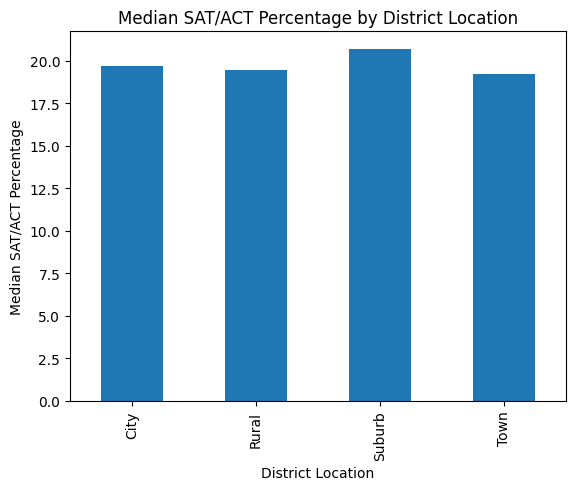

In [51]:
#graph median sat_act_percent for each of locale_cat_4 in lea_sch
lea_sch.groupby('LOCALE_CAT_4')['SCH_SAT_ACT_PERCENT'].median().plot(kind='bar')
plt.title('Median SAT/ACT Percentage by District Location')
plt.ylabel('Median SAT/ACT Percentage')
plt.xlabel('District Location')

###Rural vs Urban

Text(0.5, 0, 'District Location')

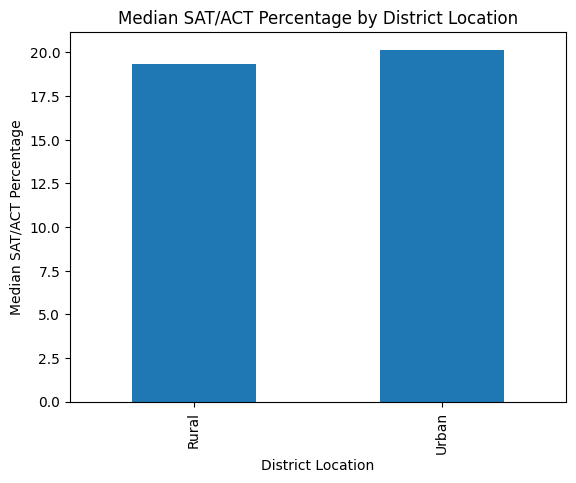

In [52]:
#graph median sat_act_percent for each of locale_cat_2 in lea_sch
lea_sch.groupby('LOCALE_CAT')['SCH_SAT_ACT_PERCENT'].median().plot(kind='bar')
plt.title('Median SAT/ACT Percentage by District Location')
plt.ylabel('Median SAT/ACT Percentage')
plt.xlabel('District Location')

##Median Student-Teacher Ratio by District Location

###Rural, Town, Suburban, Urban

Text(0.5, 0, 'District Location')

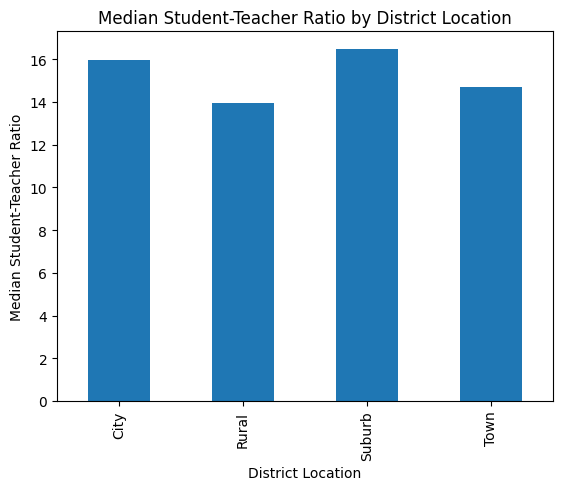

In [53]:
#graph median teacher-student ratio for each of locale_cat_4 in lea_sch
lea_sch.groupby('LOCALE_CAT_4')['STUTERATIO'].median().plot(kind='bar')
plt.title('Median Student-Teacher Ratio by District Location')
plt.ylabel('Median Student-Teacher Ratio')
plt.xlabel('District Location')

###Rural vs Urban

Text(0.5, 0, 'District Location')

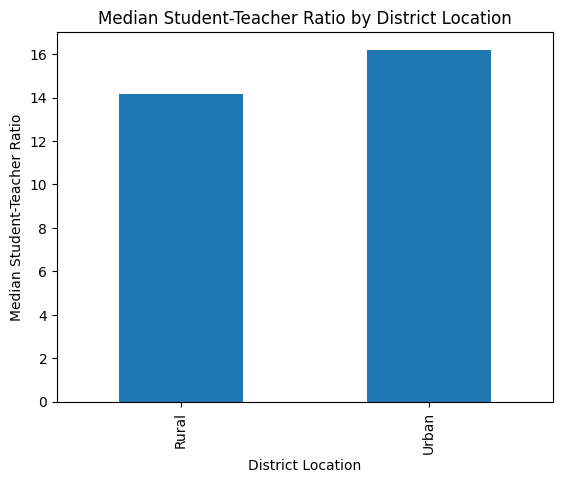

In [54]:
#graph median teacher-student ratio for each of locale_cat in lea_sch
lea_sch.groupby('LOCALE_CAT')['STUTERATIO'].median().plot(kind='bar')
plt.title('Median Student-Teacher Ratio by District Location')
plt.ylabel('Median Student-Teacher Ratio')
plt.xlabel('District Location')

##Median Number of AP Courses by District Location

###Rural, Town, Suburban, Urban

Text(0.5, 0, 'District Location')

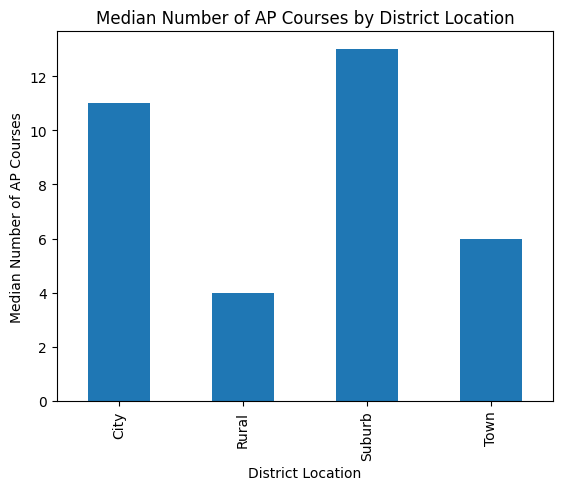

In [55]:
# graph median number of ap classes for each locale_cat in sch_lea
lea_sch.groupby('LOCALE_CAT_4')['SCH_APCOURSES'].median().plot(kind='bar')
plt.title('Median Number of AP Courses by District Location')
plt.ylabel('Median Number of AP Courses')
plt.xlabel('District Location')

###Rural vs Urban

Text(0.5, 0, 'District Location')

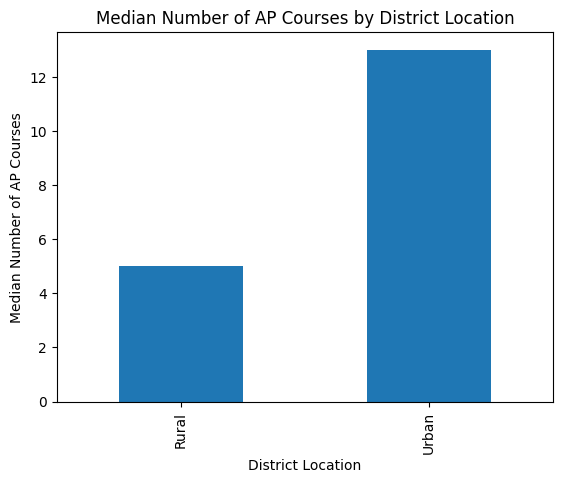

In [56]:
# graph median number of ap classes for each locale_cat in sch_lea
lea_sch.groupby('LOCALE_CAT')['SCH_APCOURSES'].median().plot(kind='bar')
plt.title('Median Number of AP Courses by District Location')
plt.ylabel('Median Number of AP Courses')
plt.xlabel('District Location')

##Median Number of Advanced Math Classes by District Location

###Rural, Town, Suburban, Urban

Text(0.5, 0, 'District Location')

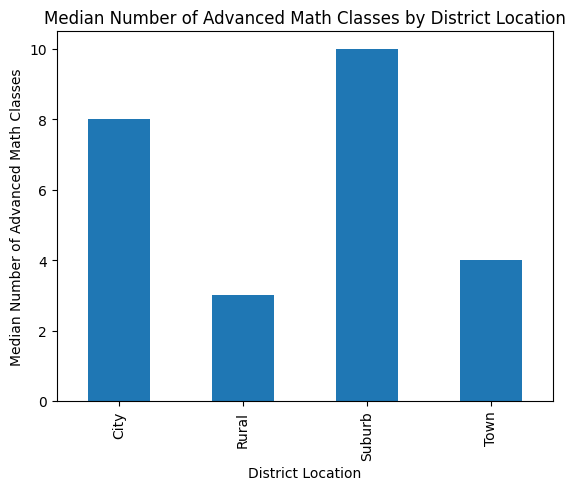

In [57]:
# graph median number of math classes for each locale_cat in sch_lea
lea_sch.groupby('LOCALE_CAT_4')['SCH_MATHCLASSES_ADVM'].median().plot(kind='bar')
plt.title('Median Number of Advanced Math Classes by District Location')
plt.ylabel('Median Number of Advanced Math Classes')
plt.xlabel('District Location')

###Rural vs Urban

Text(0.5, 0, 'District Location')

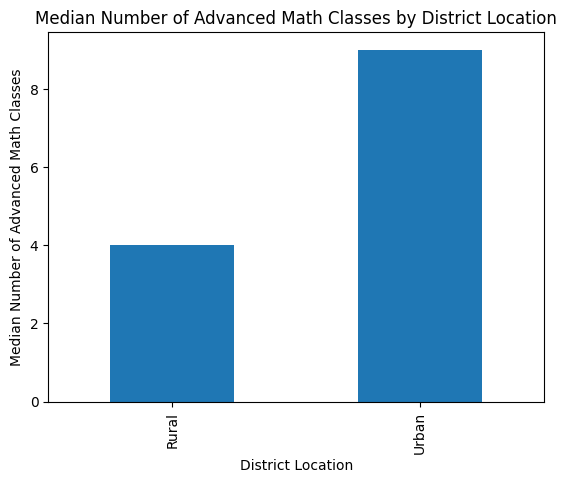

In [58]:
# graph median number of math classes for each locale_cat in sch_lea
lea_sch.groupby('LOCALE_CAT')['SCH_MATHCLASSES_ADVM'].median().plot(kind='bar')
plt.title('Median Number of Advanced Math Classes by District Location')
plt.ylabel('Median Number of Advanced Math Classes')
plt.xlabel('District Location')

##Median Number of Computer Science Classes by District Location

###Rural, Town, Suburban, Urban

Text(0.5, 0, 'District Location')

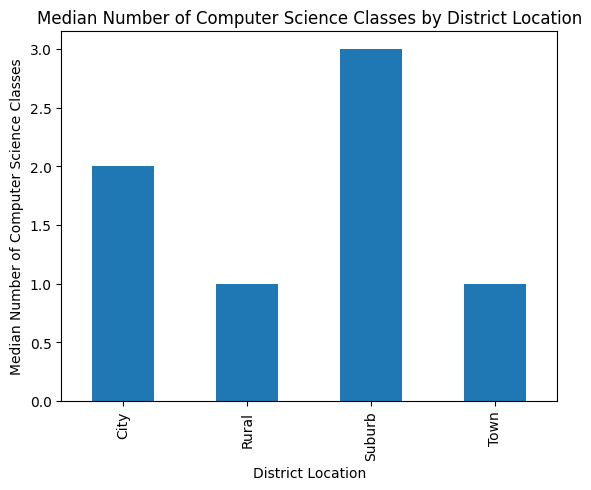

In [59]:
# graph median number of stem classes for each locale_cat
lea_sch.groupby('LOCALE_CAT_4')['SCH_COMPCLASSES_CSCI'].median().plot(kind='bar')
plt.title('Median Number of Computer Science Classes by District Location')
plt.ylabel('Median Number of Computer Science Classes')
plt.xlabel('District Location')

###Rural vs Urban

Text(0.5, 0, 'District Location')

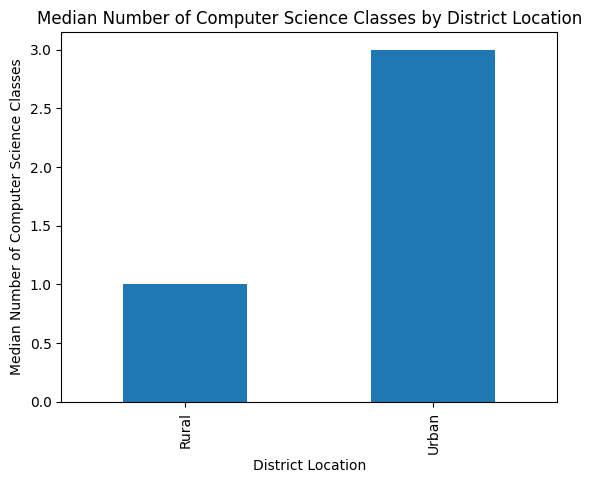

In [60]:
# graph median number of stem classes for each locale_cat
lea_sch.groupby('LOCALE_CAT')['SCH_COMPCLASSES_CSCI'].median().plot(kind='bar')
plt.title('Median Number of Computer Science Classes by District Location')
plt.ylabel('Median Number of Computer Science Classes')
plt.xlabel('District Location')

##Categorizing numerical variables

In [61]:
#seperate ap classes number into seperate categories
def ap_classifier(ap):
    if ap <= 5:
        return '0-5'
    if ap <= 10:
        return '6-10'
    elif ap <= 15:
        return '11-15'
    elif ap <= 20:
        return '16-20'
    else:
        return '21+'
lea_sch['AP_CAT'] = lea_sch['SCH_APCOURSES'].map(ap_classifier)

In [62]:
def adv_math_classifier(adv_math):
    if adv_math <=0:
        return '0'
    elif adv_math <=2:
        return '1-2'
    elif adv_math <=6:
        return '3-6'
    elif adv_math <=10:
        return '6-10'
    elif adv_math <= 14:
        return '10-14'
    else:
        return '14+'
lea_sch['ADV_MATH_CAT'] = lea_sch['SCH_MATHCLASSES_ADVM'].map(adv_math_classifier)

In [63]:
def cs_classifier(cs):
    if cs <=0:
        return '0'
    elif cs <=2:
        return '1-2'
    elif cs <= 4:
        return '3-4'
    elif cs <= 6:
        return '5-6'
    elif cs <= 8:
        return '7-8'
    else:
        return '9+'
lea_sch['CS_CAT'] = lea_sch['SCH_COMPCLASSES_CSCI'].map(cs_classifier)

In [64]:
lea_sch.describe()

,SCHID,TOT_HS_STU,TOT_SAT_ACT,SCH_SAT_ACT_PERCENT,SCH_APCOURSES,SCH_COMPCLASSES_CSCI,SCH_MATHCLASSES_ADVM,STUTERATIO,Lat,Long
count,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000
mean,3202.477712,1108.404307,219.858168,19.177358,10.612481,4.494153,10.337386,16.013035,36.785997,-94.750310
std,5837.266063,849.038363,257.255225,13.885099,8.163382,9.194863,12.550080,3.787375,5.967321,16.455353
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.620000,18.429170,-163.724886
25%,714.000000,435.000000,38.000000,7.438017,4.000000,0.000000,2.000000,13.630000,33.429231,-105.164489
50%,1696.000000,905.000000,122.000000,19.881306,9.000000,2.000000,6.000000,15.270000,37.114740,-89.245584
75%,3849.000000,1631.000000,319.000000,27.287582,16.000000,6.000000,14.000000,18.100000,40.964385,-82.377700
max,99999.000000,14967.000000,2827.000000,100.000000,39.000000,410.000000,237.000000,77.450000,64.842168,-66.072485


##Median SAT/ACT Percentage by AP Course Offerings

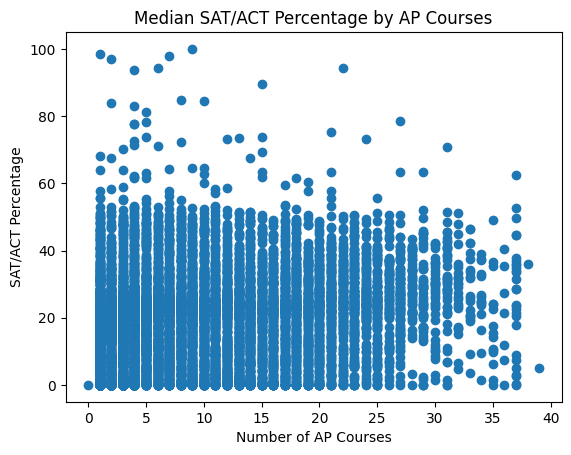

In [65]:
# scatter plot for ap classes vs sat_act percentage
plt.scatter(lea_sch['SCH_APCOURSES'], lea_sch['SCH_SAT_ACT_PERCENT'])
plt.xlabel('Number of AP Courses')
plt.ylabel('SAT/ACT Percentage')
plt.title('Median SAT/ACT Percentage by AP Courses')
plt.show()

Text(0.5, 0, 'AP Courses')

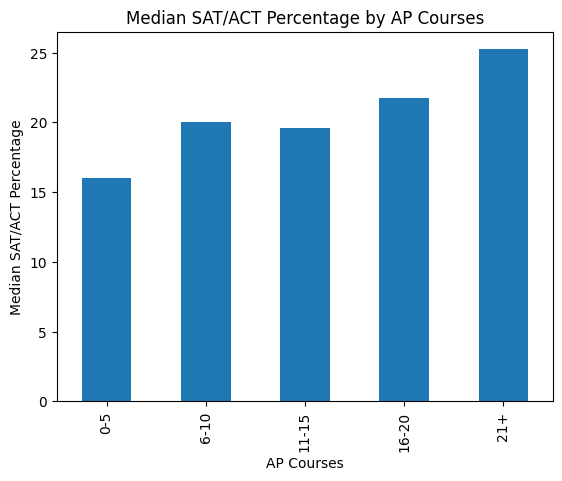

In [66]:
#graph median sat/act percentage vs ap_cat
category_order = ['0-5', '6-10', '11-15', '16-20', '21+']
lea_sch['AP_CAT'] = pd.Categorical(lea_sch['AP_CAT'],
                                         categories=category_order,
                                         ordered=True)
lea_sch.groupby('AP_CAT')['SCH_SAT_ACT_PERCENT'].median().plot(kind='bar')
plt.title('Median SAT/ACT Percentage by AP Courses')
plt.ylabel('Median SAT/ACT Percentage')
plt.xlabel('AP Courses')

##Median SAT/ACT Percentage by Advanced Math Class Offerings

Text(0.5, 0, 'Advanced Math Classes')

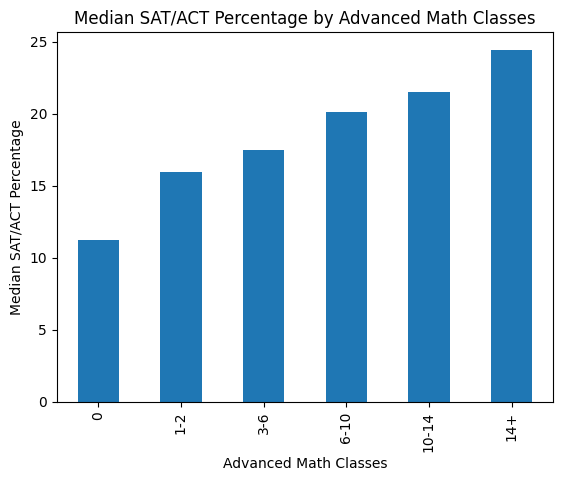

In [67]:
#graph median sat/act percentage vs adv_math_cat

category_order = ['0', '1-2', '3-6', '6-10', '10-14', '14+']
lea_sch['ADV_MATH_CAT'] = pd.Categorical(lea_sch['ADV_MATH_CAT'],
                                         categories=category_order,
                                         ordered=True)
lea_sch.groupby('ADV_MATH_CAT')['SCH_SAT_ACT_PERCENT'].median().plot(kind='bar')
plt.title('Median SAT/ACT Percentage by Advanced Math Classes')
plt.ylabel('Median SAT/ACT Percentage')
plt.xlabel('Advanced Math Classes')

##Median SAT/ACT Percentage by Computer Science Class Offerings

Text(0.5, 0, 'Computer Science Classes')

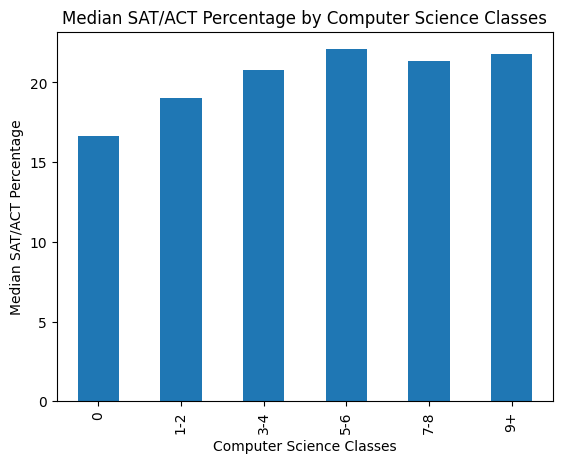

In [68]:
# median sat_act percentage vs cs classes category
lea_sch.groupby('CS_CAT')['SCH_SAT_ACT_PERCENT'].median().plot(kind='bar')
plt.title('Median SAT/ACT Percentage by Computer Science Classes')
plt.ylabel('Median SAT/ACT Percentage')
plt.xlabel('Computer Science Classes')

#Extra Classification model (urban, suburban, town, and rural district locations as target)

Using Classification Model to See if the Student Outcomes (SCH_SAT_ACT_PERCENT) and STUTERATIO can correlated with the Locale_Text

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [71]:
X = lea_sch[['SCH_APCOURSES', 'STUTERATIO']]
y = lea_sch['LOCALE_CAT_4']

In [72]:
enc = LabelEncoder()
y = enc.fit_transform(y)

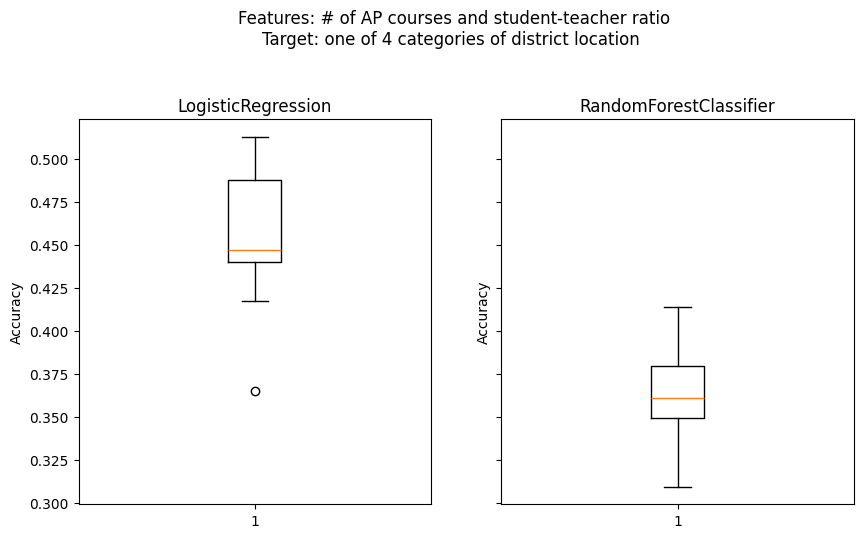

<Figure size 640x480 with 0 Axes>

In [73]:
models = [LogisticRegression, RandomForestClassifier]

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for j, model in enumerate(models):
    m = model()
    cvs = cross_val_score(m, X, y, cv=10) #How many portions that they have split the data set into  #It;s random
    ax[j].boxplot(cvs)
    ax[j].set_title(type(m).__name__)
    ax[j].set_ylabel('Accuracy')

plt.suptitle('Features: # of AP courses and student-teacher ratio\n' 'Target: one of 4 categories of district location \n \n', y=1.1)
plt.show()
plt.subplots_adjust(top=0.5)